In [1]:
!pip install yfinance
# % pip install yfinance
import yfinance as yf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [8]:
def plot(x, y, yn=None, additional_legend=None):
    fig = plt.figure(figsize=(20, 10))
    plt.title("Stock market chart of company")
    plt.plot(x, y, label="Start price")
    if yn != None:
        for i, yy in enumerate(yn):
            if additional_legend is None:
                plt.plot(x, yy)
            else:
                plt.plot(x, yy, label=f'window_size = {additional_legend[i]}')
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.grid(True)
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


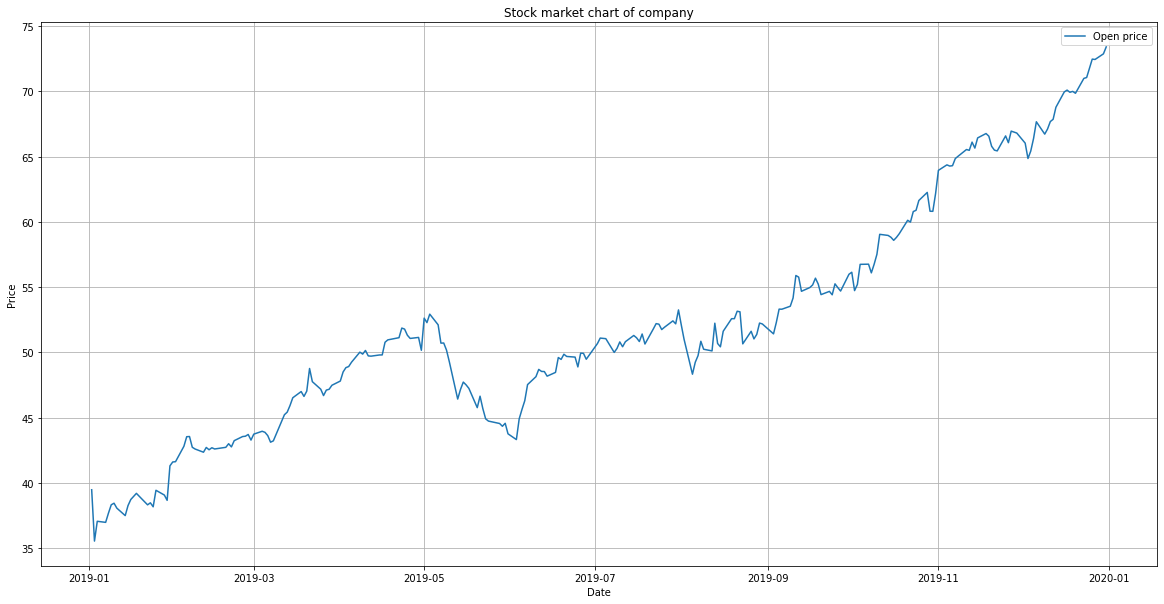

In [7]:
begin_date = "2019-01-01"
end_date = "2020-01-01"
company_name = "AAPL"

prices = yf.download(company_name, begin_date, end_date)["Close"]
date = prices.index

plot(date, prices)

w_s: 5, new_prices: 252
w_s: 9, new_prices: 252
w_s: 29, new_prices: 252


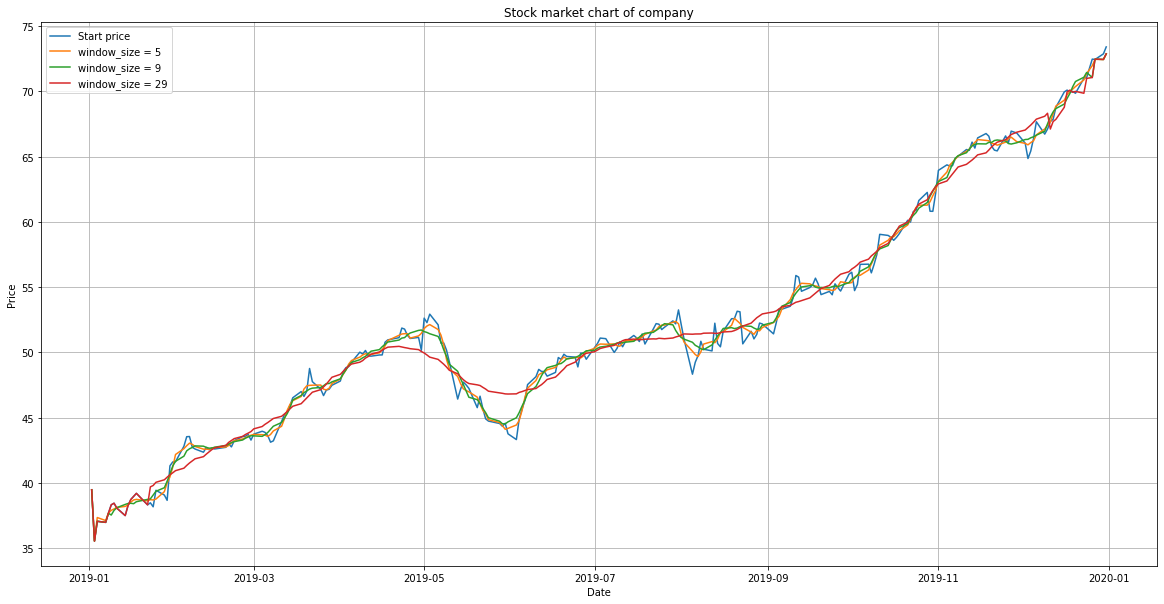

In [9]:
def calculate_price(window_size):
    new_prices = list(prices[0:window_size // 2])

    for i in range(0, len(prices) - window_size + 1):
        new_prices.append(np.mean(prices[i:i + window_size]))

    new_prices.extend(prices[len(prices) - window_size // 2 - 1:-1])
    print("w_s: {}, new_prices: {}".format(window_size, len(new_prices)))
    return new_prices

smooth_prices = list() # List containing smoothed price charts
window_sizes = [5, 9, 29] 

for window_size in window_sizes:
    smooth_prices.append(calculate_price(window_size))



plot(date, prices, smooth_prices, window_sizes)